One way to increase credit card spending is to increase the credit card limit. The bank is looking at increasing the credit card limits by 30% for its credit card customers to incentivise spending.

<b>1. Naive Approach</b>: Flat 30% increase in credit limits for all customers.<br><br>
<b>2. Heuristic Approach</b>: Targeted marketing based on customer profile. We would set a 30% increase for customers above the 50th percentile for Estimated Income. The assumption is that customers from higher income brackets have greater propensity to spend.<br>

<b>3. Data Science Approach</b>: Develop a regression model to predict for each customer (based on their credit card spending behaviour) on whether a 30% increase in credit limit would lead to an increase in credit card expenditure. 

<b>Summary of Results</b>:
Net increase in credit card spending:
1. Naive Approach: $478,693
2. Heuristic Apprach: $562,807
3. Data Science Approach: $1,669,238

# <mark>BUILDING THE REGRESSION MODEL BASED ON TRAINING DATASET</mark>

In [4]:
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
df = pd.read_csv('data/Test Dataset v2.csv')

In [6]:
df.columns

Index(['CustomerId', 'Surname', 'Geography', 'Gender', 'Age', 'Education',
       'Marital Status', 'Job', 'EstimatedIncome', 'Income Level', 'Tenure',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'Ave. cc_count',
       'CradLimit', 'CreditScore', 'Netbank', 'Complain', 'Complain Product',
       'Referral Code', 'Point Earned', 'Satisfaction Score',
       'Investment tenure you prefer', 'Fraud transaction detection',
       'Most frequent interactions with the bank', 'NumberofProducts',
       'BrokerageAccounts', 'TrustFunds', 'MutualFunds', 'RetirementAccounts',
       'PropertyInsurance', 'LifeInsurance', 'HealthInsurance', 'Annuities',
       'HasCreditCard * Ave. CreditCard Consumption', 'Exited',
       'HasCreditCard', 'NumOfProducts', 'Customer Value', 'Mergecol',
       'CC_BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'TOTAL_CC_EXPENDITURE',
       'PCT_PURCHASE', 'PCT_ONEOFFPURCHASE', 'PCT_INSTAL

In [7]:
def one_hot_encode_objects(df, drop_first=False):
    """
    Automatically applies one-hot encoding to all object type columns in a DataFrame.

    Parameters:
    - df: pandas.DataFrame
    - drop_first: bool, optional (default=False)
      Whether to drop the first level of the encoded columns to avoid multicollinearity.

    Returns:
    - pandas.DataFrame with one-hot encoded columns for object types.
    """
    # Selecting columns that are of type 'object'
    object_cols = df.select_dtypes(include=['object']).columns
    
    # Applying one-hot encoding only to these columns
    df_encoded = pd.get_dummies(df, columns=object_cols, drop_first=drop_first, dtype=int)
    
    return df_encoded

def pretty_print_linear(model, cols):
    '''Printing model in a pretty format'''
    coef = model.coef_
    terms = [f"{coef:.3f} * {col}" for col, coef in zip(cols, coef)]
    op = ' + '.join(terms).replace(' + -', ' - ')
    formula = f"y = {model.intercept_:.3f} + {op}"
    return formula

In [8]:
selected_features = ['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'CreditScore', 'Satisfaction Score', 'EstimatedIncome','Geography','Age','Ave. cc_count','Credit Card Tenure','Job']
target_variable = 'TOTAL_CC_EXPENDITURE'

df1 = df[selected_features + [target_variable]].copy()

df1

,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,CreditScore,Satisfaction Score,EstimatedIncome,Geography,Age,Ave. cc_count,Credit Card Tenure,Job,TOTAL_CC_EXPENDITURE
0,1,0,4785.174884,709,5,11.58,Germany,45,12,12,entrepreneur,0.00000
1,0,9,4026.906598,625,3,90.07,France,31,0,12,technician,0.00000
2,0,3,10496.689060,645,5,91.75,Germany,59,0,10,unemployed,0.00000
3,3,40,7562.255808,710,3,96.27,France,38,39,10,services,0.00000
4,4,0,8037.530808,629,3,106.67,France,40,37,6,unemployed,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,344,12000.000000,620,4,199909.32,France,28,53,12,retired,70262.32000
9996,0,195,18000.000000,569,5,199929.17,France,37,33,12,retired,77805.42000
9997,0,358,18000.000000,608,3,199953.33,Spain,27,47,12,admin,80081.42000
9998,0,157,17000.000000,639,3,199970.74,Germany,41,41,12,unknown,82100.80000


In [9]:
df_encoded=one_hot_encode_objects(df1)
df_encoded

,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,CreditScore,Satisfaction Score,EstimatedIncome,Age,Ave. cc_count,Credit Card Tenure,TOTAL_CC_EXPENDITURE,...,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_retired,Job_self-employed,Job_services,Job_technician,Job_unemployed,Job_unknown
0,1,0,4785.174884,709,5,11.58,45,12,12,0.00000,...,0,0,1,0,0,0,0,0,0,0
1,0,9,4026.906598,625,3,90.07,31,0,12,0.00000,...,0,0,0,0,0,0,0,1,0,0
2,0,3,10496.689060,645,5,91.75,59,0,10,0.00000,...,0,0,0,0,0,0,0,0,1,0
3,3,40,7562.255808,710,3,96.27,38,39,10,0.00000,...,0,0,0,0,0,0,1,0,0,0
4,4,0,8037.530808,629,3,106.67,40,37,6,0.00000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,344,12000.000000,620,4,199909.32,28,53,12,70262.32000,...,0,0,0,0,1,0,0,0,0,0
9996,0,195,18000.000000,569,5,199929.17,37,33,12,77805.42000,...,0,0,0,0,1,0,0,0,0,0
9997,0,358,18000.000000,608,3,199953.33,27,47,12,80081.42000,...,1,0,0,0,0,0,0,0,0,0
9998,0,157,17000.000000,639,3,199970.74,41,41,12,82100.80000,...,0,0,0,0,0,0,0,0,0,1


In [10]:
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

In [11]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 23), (2000, 23), (8000,), (2000,))

In [12]:
# Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

In [13]:
lr.fit(X_train, y_train)
print('Train RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))), 4))

y_pred = lr.predict(X_test)
print('Test RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))

print (pretty_print_linear(lr, X.columns))

Train RMSE: 2894.1517
Test RMSE: 2990.1589
y = -2507.955 + 49.897 * CASH_ADVANCE_TRX + 55.661 * PURCHASES_TRX + 0.153 * CREDIT_LIMIT - 0.082 * CreditScore + 2.610 * Satisfaction Score + 0.040 * EstimatedIncome - 5.138 * Age - 0.203 * Ave. cc_count + 39.042 * Credit Card Tenure - 10.919 * Geography_France + 38.208 * Geography_Germany - 27.289 * Geography_Spain - 330.256 * Job_Student + 108.932 * Job_admin + 51.290 * Job_blue-collar - 82.627 * Job_entrepreneur + 80.693 * Job_management - 8.739 * Job_retired + 194.776 * Job_self-employed - 67.289 * Job_services + 129.747 * Job_technician - 89.251 * Job_unemployed + 12.724 * Job_unknown


In [14]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
})

# Sorting the coefficients by their absolute values in descending order
sorted_coefficients = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index)

# Displaying sorted coefficients
print(sorted_coefficients)

               Feature  Coefficient
12         Job_Student  -330.256423
18   Job_self-employed   194.775619
20      Job_technician   129.746692
13           Job_admin   108.932171
21      Job_unemployed   -89.250849
15    Job_entrepreneur   -82.627058
16      Job_management    80.693342
19        Job_services   -67.288666
1        PURCHASES_TRX    55.661033
14     Job_blue-collar    51.290301
0     CASH_ADVANCE_TRX    49.896521
8   Credit Card Tenure    39.042149
10   Geography_Germany    38.207907
11     Geography_Spain   -27.289182
22         Job_unknown    12.723942
9     Geography_France   -10.918724
17         Job_retired    -8.739071
6                  Age    -5.138108
4   Satisfaction Score     2.609656
7        Ave. cc_count    -0.203210
2         CREDIT_LIMIT     0.153283
3          CreditScore    -0.081905
5      EstimatedIncome     0.040172


In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(8941050.368129408, 0.560874594966561)

# <mark>NAIVE APPROACH</mark>

As we do not know which customers to accord the 30% increase in credit limit, our baseline approach is to accord a flat 30% increase to all customers.

In [16]:
X_test_increased = X_test.copy()
X_test_increased['CREDIT_LIMIT'] = X_test_increased['CREDIT_LIMIT'] * 1.30

y_pred_increased = lr.predict(X_test_increased)

absolute_increase_per_customer = y_pred_increased - y_test.values

results_per_customer = pd.DataFrame({
    'CustomerId': X_test.index,
    'Expenditure Before Increase': y_test.values,
    'Expenditure After Increase': y_pred_increased,
    'Absolute Increase in Expenditure': absolute_increase_per_customer
})


total_absolute_increase = absolute_increase_per_customer.sum()
percentage_increase = (total_absolute_increase / y_test.sum()) * 100

total_absolute_increase, percentage_increase

(478693.55699357536, 6.879127741960142)

<b>Commentary</b>

According a 30% increase in credit limits for all customers would lead to a total increase in credit card expenditure by <u>$478,693</u> (6.88%).

In [17]:
results_per_customer.head()

,CustomerId,Expenditure Before Increase,Expenditure After Increase,Absolute Increase in Expenditure
0,6252,3317.250842,4389.054077,1071.803235
1,4684,2118.813041,3012.894168,894.081127
2,1731,713.245337,331.938466,-381.306871
3,4742,2162.750312,4501.434224,2338.683912
4,4521,2014.386387,1980.829210,-33.557177


In [18]:
results = pd.DataFrame({
    'Approach': ['Naive'],
    'Total Increase in Expenditure': [total_absolute_increase],
    'Percentage Increase in Expenditure': [percentage_increase]
})
results

,Approach,Total Increase in Expenditure,Percentage Increase in Expenditure
0,Naive,478693.556994,6.879128


<b>Commentary</b>

We further performed a deep-dive into the increase in credit card expenditure of individual customers. As seen from the dataframe above, according a 30% increase in credit limit to customers may not necessarily lead to an increase in credit card expenditure for everyone. For example, the credit card expenditure for Customers 4742 and 4521 actually decreased after the 30% increase in credit limit.

Hence, we would need to exclude such customers from our selection when according the 30% increase in credit limit.

# <mark>HEURISTIC APPROACH</mark>

One possible method to exclude such customers is to visually inspect the relationship of selected features against total credit card expenditure. Based on this relationship, we can narrow down the customer segment that we want to offer the 30% credit limit increase to.

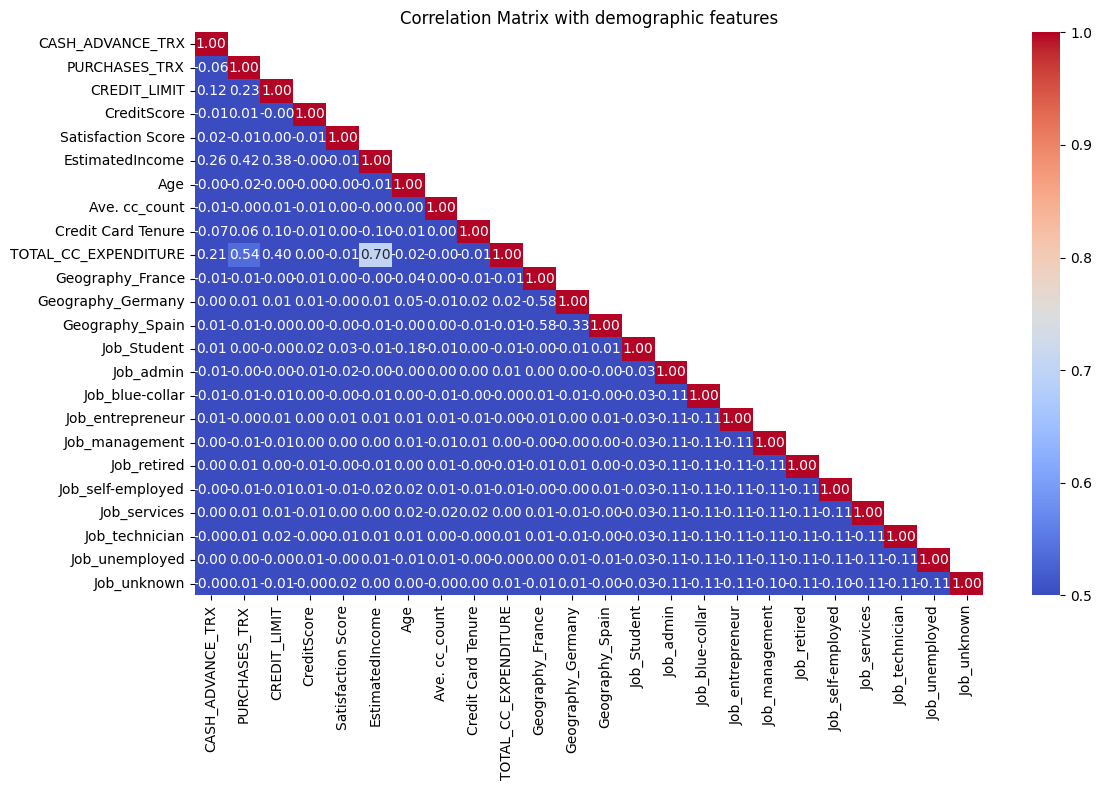

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8), layout='tight')
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=0.5, mask=np.triu(corr_matrix, k=1), cmap='coolwarm')
plt.title('Correlation Matrix with demographic features')
plt.show()


From the correlation matrix above, we can see that total credit card expenditure has a moderate positive correlation with a customer's estimated income. This implies that if a customer's estimated income is high, then their credit card expenditure tends to be high as well.

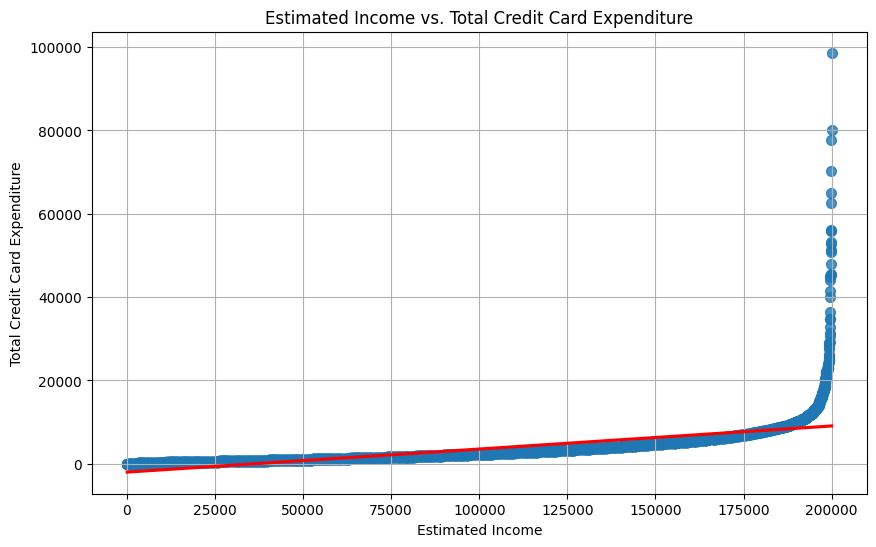

In [20]:
selected_features = ['EstimatedIncome', 'TOTAL_CC_EXPENDITURE']

X = df_encoded[selected_features]
y = df_encoded['TOTAL_CC_EXPENDITURE']

X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

train_estimated_income = X_train['EstimatedIncome']
train_total_expenditure = y_train

plt.figure(figsize=(10, 6))
sns.regplot(x=train_estimated_income, y=train_total_expenditure, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Estimated Income vs. Total Credit Card Expenditure')
plt.xlabel('Estimated Income')
plt.ylabel('Total Credit Card Expenditure')
plt.grid(True)
plt.show()

Based on this observation, we can consider offering the 30% credit limit increase to customers with higher estimated income. In this case, we would accord the 30% credit limit increase to customers with estimated income above the 50th percentile.

In [21]:
# Increasing the credit limits of high income customers above the 50th percentile.
income_median = X_test['EstimatedIncome'].median()
high_income_mask = X_test['EstimatedIncome'] > income_median
X_test_increased = X_test.copy()
X_test_increased.loc[high_income_mask, 'CREDIT_LIMIT'] *= 1.30

y_pred_increased = lr.predict(X_test_increased)

absolute_increase_per_customer = y_pred_increased - y_test.values

results_high_income_customers = X_test[high_income_mask].copy()
results_high_income_customers['Expenditure Before Increase'] = y_test[high_income_mask].values
results_high_income_customers['Expenditure After Increase'] = y_pred_increased[high_income_mask]
results_high_income_customers['Absolute Increase in Expenditure'] = absolute_increase_per_customer[high_income_mask]

total_absolute_increase = results_high_income_customers['Absolute Increase in Expenditure'].sum()

total_expenditure_before = results_high_income_customers['Expenditure Before Increase'].sum()
percentage_increase = (total_absolute_increase / total_expenditure_before) * 100


total_absolute_increase, percentage_increase

(562807.5500070329, 9.521974558635883)

In [23]:
results_high_income_customers.tail()

,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,CreditScore,Satisfaction Score,EstimatedIncome,Age,Ave. cc_count,Credit Card Tenure,Geography_France,...,Job_management,Job_retired,Job_self-employed,Job_services,Job_technician,Job_unemployed,Job_unknown,Expenditure Before Increase,Expenditure After Increase,Absolute Increase in Expenditure
8719,6,63,0.00000,637,4,174536.17,40,48,9,1,...,0,0,1,0,0,0,0,6866.205645,8587.753125,1721.547480
6412,0,1,0.00000,506,4,127543.81,37,53,11,1,...,0,0,0,0,0,0,1,3454.301651,2870.775011,-583.526640
8285,0,23,1600.00000,819,3,166164.30,49,0,12,0,...,0,0,0,0,1,0,0,5922.920000,6091.665828,168.745828
7853,10,18,7000.00000,698,4,157143.61,51,41,12,1,...,0,0,0,0,1,0,0,5188.114999,6970.780124,1782.665125
6929,8,27,11119.06846,716,5,138051.19,41,43,12,0,...,0,0,0,0,0,0,0,4001.531566,7314.617873,3313.086307


In [183]:
results = pd.concat([results,pd.DataFrame({
                                        'Approach': ['Heuristic'],
                                        'Total Increase in Expenditure': [total_absolute_increase],
                                        'Percentage Increase in Expenditure': [percentage_increase]
})], ignore_index=True)
results

,Approach,Total Increase in Expenditure,Percentage Increase in Expenditure
0,Naive,478693.556994,6.879128
1,Heuristic,562807.550007,9.521975


<b>Commentary</b>

According a 30% increase in credit limits to high income customers above the 50th percentile would lead to a total increase in credit card expenditure by <u>$562,807</u> (9.52%).

This increase in credit card expenditure is 3% higher than the Naive approach, signifying that a more personalised approach of understanding the credit card expenditure behaviour of a customer would lead to higher returns.

# <mark>DATA SCIENCE APPROACH</mark>

A customer's credit card expenditure can be affected by multiple variables as established by the Naive and Heuristic approaches. Hence, we can build a predictive model to model customer credit card behaviour. Based on their predicted behaviour (whether they would increase their credit card spending), we can accord the 30% increase in credit limit accordingly.

In [185]:
percentage_increases = [0, 30]

optimal_increase = []
expenditure_after_optimal = []
expenditure_increase = []

for i in range(len(X_test)):
    best_increase = 0
    best_expenditure = y_test.iloc[i]
    best_increase_amount = 0
    
    for percent in percentage_increases:

        X_test_temp = X_test.iloc[[i]].copy()
        X_test_temp['CREDIT_LIMIT'] *= (1 + percent / 100.0)
        
        predicted_expenditure = lr.predict(X_test_temp)[0]
        
        if predicted_expenditure > best_expenditure:
            best_increase = percent
            best_expenditure = predicted_expenditure
            best_increase_amount = predicted_expenditure - y_test.iloc[i]
    
    if best_increase == 0:
        expenditure_after_optimal_value = y_test.iloc[i]
        expenditure_increase_value = 0 
    else:
        expenditure_after_optimal_value = best_expenditure
        expenditure_increase_value = best_increase_amount

    optimal_increase.append(best_increase)
    expenditure_after_optimal.append(expenditure_after_optimal_value)
    expenditure_increase.append(expenditure_increase_value)

results_df = pd.DataFrame({
    'CustomerId': X_test.index,
    'Expenditure Before Increase': y_test.values,
    'Optimal % Increase': optimal_increase,
    'Expenditure After Optimal Increase': expenditure_after_optimal,
    'Expenditure Increase': expenditure_increase
})

total_expenditure_before = y_test.sum()
total_expenditure_after = sum(results_df['Expenditure After Optimal Increase'])
total_increase = total_expenditure_after - total_expenditure_before
percentage_increase = (total_increase / total_expenditure_before) * 100

total_increase, percentage_increase

(1669238.9069581442, 23.988013845294155)

In [186]:
results_df.head()

,CustomerId,Expenditure Before Increase,Optimal % Increase,Expenditure After Optimal Increase,Expenditure Increase
0,6252,3317.250842,30,4389.054077,1071.803235
1,4684,2118.813041,30,3012.894168,894.081127
2,1731,713.245337,0,713.245337,0.000000
3,4742,2162.750312,30,4501.434224,2338.683912
4,4521,2014.386387,0,2014.386387,0.000000


In [187]:
results = pd.concat([results,pd.DataFrame({
                                        'Approach': ['Data Science'],
                                        'Total Increase in Expenditure': [total_increase],
                                        'Percentage Increase in Expenditure': [percentage_increase]
})], ignore_index=True)
results

,Approach,Total Increase in Expenditure,Percentage Increase in Expenditure
0,Naive,4.786936e+05,6.879128
1,Heuristic,5.628076e+05,9.521975
2,Data Science,1.669239e+06,23.988014


<b>Commentary</b>

According a 30% increase in credit limits for selected customers based on their predicted behavoiurs would leadd to a total increase in credit card expenditure by <u>$1,669,238</u> (23.9%).

This is a significant increase as compared to the Naive Approach due to the exclusion of customers with a decrease in expenditure after the credit limit increase (~$1M impact).

# For Future Work
* The regression model has a $R^2$ of 0.2. This implies that the existing information in the dataset is limited in explaining credit card expenditure. 
* Hence, additional data may be collected:
    * Transaction categories (e.g. groceries, travel, dining). This would allow the bank to cater the promotions to specific categories.
    * Credit card repayment behaviour - this would enable to bank to identify customers at a higher risk of default and cater their credit limits offerings accordingly. 
    * Time series data. Data on customer expenditure behaviour before and after certain promotional activities would enable the bank to identify promotions which drive the most significant changes in spending behaviour.